# Problem 1

In [16]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [17]:
# dataset 4
n = 200
np.random.seed(1234)
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

x_d4 = np.concatenate([np.ones([n,1]), x_d4],1) # x_i contains 1

In [18]:
# params
lr = 0.01
lam = 2
num_iter = 50

In [19]:
def J(w_t):
  J = lam*w_t@w_t.T
  for i in range(n):
    J += np.log(1 + np.exp(-y_d4[i] * w_t@x_d4[i].T))
  return J

def dJ(w_t):
  dJ = 2*lam*w_t
  for i in range(n):
    post = 1 / (1 + np.exp(-y_d4[i] * w_t @ x_d4[i].T))
    dJ += (post-1)*y_d4[i]*x_d4[i]
  return dJ

def d2J(w_t):
  d2J = 2*lam*np.ones([5,5])
  for i in range(n):
    post = 1 / (1 + np.exp(-y_d4[i] * w_t @ x_d4[i].T))
    d2J += post*(1-post)*(x_d4[i].reshape(5,1)@x_d4[i].reshape(1,5))
  return d2J

In [20]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here
w=np.ones(5)
for t in range(num_iter):
  loss = J(w)
  dj = dJ(w)
  loss_hist_batch.append(loss)
  w -= lr*dj

In [21]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
w=np.ones(5)
for t in range(num_iter):
  loss = J(w)
  dj = dJ(w)
  d2j = d2J(w)
  loss_hist_newton.append(loss)
  w -= np.linalg.inv(d2j)@dj

Text(0, 0.5, 'loss')

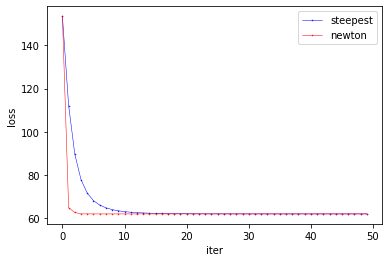

In [22]:
# plot the result of loss
plt.plot(loss_hist_batch, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot(loss_hist_newton, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')

(1e-12, 1000.0)

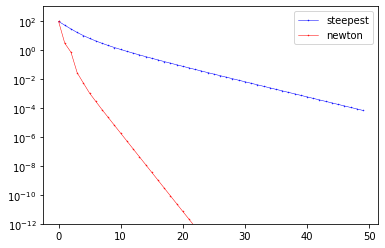

In [23]:
# plot the result of diff
loss_hat = min(loss_hist_batch[-1], loss_hist_newton[-1])
plt.plot(abs(loss_hist_batch-loss_hat), 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot(abs(loss_hist_newton-loss_hat), 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.yscale('log')
plt.ylim([1e-12,1e+3])

# multiclass

In [24]:
# dataset 5
n = 200
np.random.seed(seed=32)
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

x_d5 = np.concatenate([np.ones([n,1]), x_d5],1) # x_i contains 1

In [25]:
# params
lam = 1.5
lr = 0.1
num_category = 3
num_iter = 50

In [26]:
def sumc(w,xi):
  sumc = 0
  for c in range(num_category):
    sumc += np.exp(w[c]@xi.T)
  return sumc

def J(w):
  J = 0
  for c in range(num_category):
    J += lam*w[c]@w[c].T
  for i in range(n):
    J += np.log(sumc(w,x_d5[i])) - w[y_d5[i]]@x_d5[i].T
  return J

def dJ(w):
  dJ = 2*lam*w
  for i in range(n):
    for c in range(num_category):
      post = np.exp(w[c]@x_d5[i].T) / sumc(w,x_d5[i])
      if c == y_d5[i]:
        dJ[c] += x_d5[i]*(post-1)
      else:
        dJ[c] += x_d5[i]*post
  return dJ

def d2J(w_t):
  d2J = 2*lam*np.ones([3,5,5])
  for i in range(n):
    for c in range(num_category):
      su = sumc(w,x_d5[i])
      ex = np.exp(w[c]@x_d5[i].T)
      d2J[c] += ((su*ex - ex*ex) / (su*su)) * x_d5[i].reshape(5,1)@x_d5[i].reshape(1,5)
  return d2J

In [27]:
loss_hist_batch = [] # to store the history of loss J(w_t)
# implement batch steepest gradient method here
w = np.zeros([3,5])
lr = 0.01
for t in range(num_iter):
  loss = J(w)
  dj = dJ(w)
  w -= lr*dj
  loss_hist_batch.append(loss)

In [28]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
w = np.ones([3,5])
lr = 0.7
for t in range(1, num_iter+1):
  loss = J(w)
  dj = dJ(w)
  d2j = d2J(w)
  loss_hist_newton.append(loss)
  for c in range(num_category):
    w[c] -= lr*np.linalg.inv(d2j[c])@dj[c]

Text(0, 0.5, 'loss')

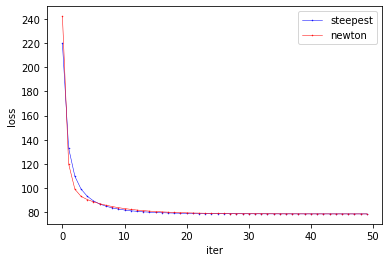

In [29]:
# plot the result of loss
plt.plot(loss_hist_batch, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot(loss_hist_newton, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')

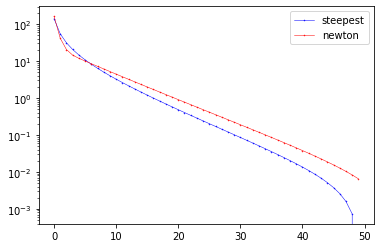

In [30]:
# plot the result of diff
loss_hat = min(loss_hist_batch[-1], loss_hist_newton[-1])
plt.plot(abs(loss_hist_batch-loss_hat), 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.plot(abs(loss_hist_newton-loss_hat), 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.yscale('log')